#  Realizando a conexão com o driver

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
%cd '/gdrive/My Drive/PDFS'
%ls

/gdrive/My Drive/PDFS
'comorbidades  com doses  e data..csv'      Download_arquivos_01_11_2021.txt
 comorbidade.txt                            Download_arquivos_28_10_2021.txt
 Contador_ID.txt                            Download_arquivos_29_10_2021.txt
 controle_mensal_amostras_fora_padrao.csv   Download_arquivos_31_10_2021.txt
'dados publicacao.csv'                      new.csv


# Importando a base de dados

In [3]:
import zipfile
import pandas as pd
import time

# Realizando o download da base

dados = !wget --no-check-certificate https://sage.saude.gov.br/dados/sisagua/controle_mensal_amostras_fora_padrao.zip

# Pegando os CSV's que se encontravam zipados

with zipfile.ZipFile('controle_mensal_amostras_fora_padrao.zip',"r") as zip_ref:
    zip_ref.extractall("Sisagua")

time.sleep(20)

%cd 'Sisagua'
%ls

# Lendo o Dataframe

df = pd.read_csv('controle_mensal_amostras_fora_padrao.csv', encoding='latin_1',sep=';',decimal=',',
                 dtype={'Código IBGE':'object','CNPJ da Instituição':'object',r'CNPJ do escritório regional/local':'object'})

/gdrive/My Drive/PDFS/Sisagua
controle_mensal_amostras_fora_padrao.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Visão geral do formato das colunas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516632 entries, 0 to 516631
Data columns (total 31 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Região Geográfica                          516632 non-null  object 
 1   UF                                         516632 non-null  object 
 2   Regional de Saúde                          516632 non-null  object 
 3   Município                                  516632 non-null  object 
 4   Código IBGE                                516632 non-null  object 
 5   Tipo da Instituição                        515093 non-null  object 
 6   Sigla da Instituição                       285147 non-null  object 
 7   Nome da Instituição                        515093 non-null  object 
 8   CNPJ da Instituição                        515093 non-null  object 
 9   Nome do escritório regional/local          285147 non-null  object 
 10  CNPJ do 

# Contagem de valores nulos

In [5]:
df.isnull().astype(int).sum()

Região Geográfica                                 0
UF                                                0
Regional de Saúde                                 0
Município                                         0
Código IBGE                                       0
Tipo da Instituição                            1539
Sigla da Instituição                         231485
Nome da Instituição                            1539
CNPJ da Instituição                            1539
Nome do escritório regional/local            231485
CNPJ do escritório regional/local            231485
Tipo da Forma de Abastecimento                    0
Código Forma de abastecimento                     0
Nome da Forma de Abastecimento                    0
Ano de referência                                 0
Mês de referência                                 0
Data de registro                                  0
Data de preenchimento do relatório mensal        18
Data da coleta                                   16
Ponto de Mon

# Conferindo se existem 27 UF's

In [6]:
df['UF'].value_counts()

SP    267904
BA     64957
SE     40050
SC     38838
ES     20659
RS     18450
MG     12868
GO      8323
DF      8004
RJ      6087
AM      5934
PI      5697
MT      4259
MA      2917
PB      2492
RN      2286
MS      1969
PR      1759
RR       913
AL       502
RO       490
TO       468
PA       339
PE       219
CE       203
AP        40
AC         5
Name: UF, dtype: int64

# Conferindo se as 5 regiões estão corretas

In [7]:
df['Região Geográfica'].value_counts()

SUDESTE         307518
NORDESTE        119323
SUL              59047
CENTRO-OESTE     22555
NORTE             8189
Name: Região Geográfica, dtype: int64

# Conferindo se o Código IBGE está indexado corretamente

In [8]:
(df.drop_duplicates(subset ="Código IBGE", keep = 'last')['Código IBGE']).to_csv('new.csv', index=False)

Existem 31 códigos IBGE que não tiveram correspondência com a base disponibilizada pelo Ministério da saúde, sendo estes:

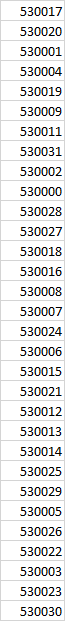

Conferindo quais municipios são referentes os códigos do IBGE

In [9]:
df[df['Código IBGE']=='530030'].head(1)

,Região Geográfica,UF,Regional de Saúde,Município,Código IBGE,Tipo da Instituição,Sigla da Instituição,Nome da Instituição,CNPJ da Instituição,Nome do escritório regional/local,CNPJ do escritório regional/local,Tipo da Forma de Abastecimento,Código Forma de abastecimento,Nome da Forma de Abastecimento,Ano de referência,Mês de referência,Data de registro,Data de preenchimento do relatório mensal,Data da coleta,Ponto de Monitoramento,Parâmetro,Zona,Categoria Área,Área,Tipo do local,Local,Endereço,Latitude,Longitude,Resultado,Providência do controle
221,CENTRO-OESTE,DF,UNICA,VICENTE PIRES,530030,Regional,CAESB,COMPANHIA DE SANEAMENTO AMBIENTAL DO DISTRITO ...,82024000137,CAESB REGIONAL UNICA,82024000137,SAA,S530009000001,DESCOBERTO,2014,3,2014/08/08 00:00:00.000,2014/08/08 00:00:00.000,2014/03/12 00:00:00.000,SISTEMA DE DISTRIBUIÇÃO,Turbidez (uT),Urbana,Bairro,COLONIA AGRICOLA SAMAMBAIA,NaN,NaN,Rua 40/42 - lado da EPTG,NaN,NaN,"11,1",Descarga de rede


# Tipos de instituições presentes na base

In [10]:
df['Tipo da Instituição'].value_counts()

Regional    285147
Local       229946
Name: Tipo da Instituição, dtype: int64

# Siglas das 66 instituições presentes no banco com suas respectivas frequências

Algumas siglas se encontram cortadas ou com presença de espaçamentos na sua escrita

In [11]:
pd.options.display.max_rows=1000

In [12]:
df['Sigla da Instituição'].value_counts()

SABESP        116211
EMBASA         62787
DESO           40019
CASAN          31006
CAESB           8004
CESAN           7746
CAEMA           2601
CEDAE           2406
COPASA          2386
CAERN           2281
CORSAN          1662
AGESPISA        1244
SANESUL         1100
SANEPAR         1037
BRK AMBIEN       471
CAERD            438
SANEATINS        427
SANEAGO          411
AB TRIANGU       323
SIMAE            320
AB COLINAS       223
COSANPA          222
RDB              204
COMPESA          157
HIDROS           156
AUTOBAN          149
SPVIAS           108
AGJ               85
COSAMA            83
AUTOVIAS          81
SHO               74
REGIS BITT        74
SOFT SUL P        70
CART              68
CTEEP             66
LICS R            64
INTERVIAS         44
CENTROVIAS        43
CAESA             40
ATS               37
RENOVIAS          30
SIMAE2            29
VIA NORTE         29
RODOANEL O        22
VPAULISTA         21
AP FERNAO         11
LABORPLAN          9
LIGIANE A    

# Conferindo se existe nomes de instituições preenchidos como número

In [13]:
instituicao = list((df.drop_duplicates(subset ="Nome da Instituição", keep = 'last')['Nome da Instituição']))

In [14]:
import collections

frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = instituicao[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({False: 3980})


# Conferindo se possui string na variavel CNPJ

In [15]:
CNPJ = list((df.drop_duplicates(subset ="CNPJ da Instituição", keep = 'last')['CNPJ da Instituição']))

In [16]:
frequencia = []

for i in range(0,len(CNPJ)):
  try:
    result = isinstance(CNPJ[i], str)
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 4176, False: 1})


# Analisando o tamanho dos CNPJ's

In [17]:
frequencia = []

for i in range(0,len(CNPJ)):
  try:
    result = sum(len(i) for i in CNPJ[i])
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({14: 2664, 13: 1365, 12: 127, 11: 18, 9: 1, 10: 1})


# Conferindo se o nome da instituição regional / local esta preenchido como string

In [18]:
instituicao = list((df.drop_duplicates(subset ="Nome do escritório regional/local", keep = 'last')['Nome do escritório regional/local']))

In [19]:
import collections

frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = instituicao[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({False: 488})


# Conferindo se possui valores textuais na variavel CNPJ do escritório regional/local

In [20]:
CNPJ = list((df.drop_duplicates(subset ="CNPJ do escritório regional/local", keep = 'last')['CNPJ do escritório regional/local']))

In [21]:
frequencia = []

for i in range(0,len(CNPJ)):
  try:
    result = isinstance(CNPJ[i], str)
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 369, False: 1})


# Conferindo a frequência de caracteres na variável CNPJ do escritório regional/local

In [22]:
instituicao = list((df.drop_duplicates(subset ="CNPJ do escritório regional/local", keep = 'last')['CNPJ do escritório regional/local']))

In [23]:
frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = sum(len(i) for i in instituicao[i])
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({14: 305, 13: 62, 11: 1, 12: 1})


# Tipo da forma de abastecimento

In [24]:
df['Tipo da Forma de Abastecimento'].value_counts()

SAA    412062
SAC    104570
Name: Tipo da Forma de Abastecimento, dtype: int64

### Conferindo se tem nome preenchido apenas com números

In [25]:
instituicao = list((df.drop_duplicates(subset ="Nome da Forma de Abastecimento", keep = 'last')['Nome da Forma de Abastecimento']))

In [26]:
import collections

frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = instituicao[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({False: 9543, True: 4})


# Ano de referência

In [27]:
df['Ano de referência'].value_counts()

2020    101187
2019     86470
2021     85865
2018     79548
2017     79023
2016     34875
2014     25498
2015     24166
Name: Ano de referência, dtype: int64

# Mês de referência

In [28]:
df['Mês de referência'].value_counts()

1     47399
4     45509
5     44740
3     43905
2     43892
9     43542
10    43444
6     43246
7     43074
8     43051
11    37865
12    36965
Name: Mês de referência, dtype: int64

# Data de registro

In [29]:
from collections import Counter

# Separando os anos 

Ano = []

for i in range(0,len(df['Data de registro'])):
  Ano.append(df['Data de registro'][i][0:4])

# Separando os meses

print(50 * '--')

print(" Ano ")

print(50 * '--')

print(Counter(Ano))


mes = []

for i in range(0,len(df['Data de registro'])):
  mes.append(df['Data de registro'][i][5:7])


print(50 * '--')

print(" Mes ")

print(50 * '--')

print(Counter(mes))


# Separando os dias

dia = []

for i in range(0,len(df['Data de registro'])):
  dia.append(df['Data de registro'][i][8:10])


print(50 * '--')

print(" Dia ")

print(50 * '--')

print(Counter(dia))

----------------------------------------------------------------------------------------------------
 Ano 
----------------------------------------------------------------------------------------------------
Counter({'2020': 100641, '2021': 95705, '2019': 87221, '2018': 80014, '2017': 76494, '2015': 34772, '2016': 34091, '2014': 7694})
----------------------------------------------------------------------------------------------------
 Mes 
----------------------------------------------------------------------------------------------------
Counter({'10': 52091, '08': 47632, '05': 46781, '09': 46659, '11': 46057, '07': 43756, '03': 41898, '04': 40167, '06': 39552, '12': 38745, '01': 37799, '02': 35495})
----------------------------------------------------------------------------------------------------
 Dia 
----------------------------------------------------------------------------------------------------
Counter({'10': 42801, '09': 42170, '08': 35714, '07': 25552, '14': 24581, '06': 

# Data de preenchimento do relatório mensal

In [30]:
from collections import Counter

DT_registro = []

for i in range(0,len(df['Data de preenchimento do relatório mensal'])):

  if len(str(df['Data de preenchimento do relatório mensal'][i])) > 5:

    DT_registro.append(df['Data de preenchimento do relatório mensal'][i][0:10])

# Separando os anos 

Ano = []

for i in range(0,len(df['Data de preenchimento do relatório mensal'])):
  if len(str(df['Data de preenchimento do relatório mensal'][i])) > 5:
    Ano.append(df['Data de preenchimento do relatório mensal'][i][0:4])

# Separando os meses

print(50 * '--')

print(" Ano ")

print(50 * '--')

print(Counter(Ano))


mes = []

for i in range(0,len(df['Data de preenchimento do relatório mensal'])):
  if len(str(df['Data de preenchimento do relatório mensal'][i])) > 5:
    mes.append(df['Data de preenchimento do relatório mensal'][i][5:7])


print(50 * '--')

print(" Mes ")

print(50 * '--')

print(Counter(mes))


# Separando os dias

dia = []

for i in range(0,len(df['Data de preenchimento do relatório mensal'])):
  if len(str(df['Data de preenchimento do relatório mensal'][i])) > 5:
    dia.append(df['Data de preenchimento do relatório mensal'][i][8:10])


print(50 * '--')

print(" Dia ")

print(50 * '--')

print(Counter(dia))

----------------------------------------------------------------------------------------------------
 Ano 
----------------------------------------------------------------------------------------------------
Counter({'2020': 100652, '2021': 94661, '2019': 87047, '2018': 79301, '2017': 75917, '2015': 33913, '2016': 32281, '2014': 12842})
----------------------------------------------------------------------------------------------------
 Mes 
----------------------------------------------------------------------------------------------------
Counter({'10': 51463, '08': 46750, '05': 46113, '11': 45428, '09': 44626, '07': 42715, '03': 42079, '06': 41458, '04': 41310, '12': 38849, '02': 38833, '01': 36990})
----------------------------------------------------------------------------------------------------
 Dia 
----------------------------------------------------------------------------------------------------
Counter({'09': 40369, '08': 39423, '10': 37988, '07': 34533, '06': 32913, '05':

# Data de preenchimento do relatório mensal

In [31]:
from collections import Counter

DT_registro = []

for i in range(0,len(df['Data da coleta'])):

  if len(str(df['Data da coleta'][i])) > 5:

    DT_registro.append(df['Data da coleta'][i][0:10])

# Separando os anos 

Ano = []

for i in range(0,len(df['Data da coleta'])):
  if len(str(df['Data da coleta'][i])) > 5:
    Ano.append(df['Data da coleta'][i][0:4])

# Separando os meses

print(50 * '--')

print(" Ano ")

print(50 * '--')

print(Counter(Ano))


mes = []

for i in range(0,len(df['Data da coleta'])):
  if len(str(df['Data da coleta'][i])) > 5:
    mes.append(df['Data da coleta'][i][5:7])


print(50 * '--')

print(" Mes ")

print(50 * '--')

print(Counter(mes))


# Separando os dias

dia = []

for i in range(0,len(df['Data da coleta'])):
  if len(str(df['Data da coleta'][i])) > 5:
    dia.append(df['Data da coleta'][i][8:10])


print(50 * '--')

print(" Dia ")

print(50 * '--')

print(Counter(dia))

----------------------------------------------------------------------------------------------------
 Ano 
----------------------------------------------------------------------------------------------------
Counter({'2020': 101187, '2019': 86468, '2021': 85864, '2018': 79543, '2017': 79021, '2016': 34873, '2014': 25498, '2015': 24162})
----------------------------------------------------------------------------------------------------
 Mes 
----------------------------------------------------------------------------------------------------
Counter({'01': 47398, '04': 45507, '05': 44739, '03': 43903, '02': 43888, '09': 43542, '10': 43444, '06': 43242, '07': 43073, '08': 43051, '11': 37864, '12': 36965})
----------------------------------------------------------------------------------------------------
 Dia 
----------------------------------------------------------------------------------------------------
Counter({'13': 19097, '18': 18973, '06': 18872, '05': 18727, '14': 18668, '10':

# Ponto de Monitoramento

In [32]:
df['Ponto de Monitoramento'].value_counts()

SISTEMA DE DISTRIBUIÇÃO    412062
PONTO DE CONSUMO           104570
Name: Ponto de Monitoramento, dtype: int64

# Parâmetro

In [33]:
df['Parâmetro'].value_counts()

Cloro Residual Livre (mg/L)          239474
Cor (uH)                              62735
Coliformes totais                     54641
Fluoreto (mg/L)                       53471
Turbidez (uT)                         46405
pH                                    40680
Escherichia coli                       7876
Cloro Residual Combinado (mg/L)        6304
Bactérias Heterotróficas (UFC/mL)      3692
Dióxido de Cloro                       1354
Name: Parâmetro, dtype: int64

# Zona

In [34]:
df['Zona'].value_counts()

Urbana    459365
Rural      57246
Name: Zona, dtype: int64

# Categoria Área

In [35]:
df['Categoria Área'].value_counts()

Bairro                        418122
Povoado/Lugarejo               39675
Área urbana isolada            27760
Núcleo/Propriedade Rural       15097
Sede de distrito (ou vila)     13483
Comunidade Ribeirinha            995
Comunidade Quilombola            872
Reserva Extrativista             325
Projeto de assentamento          181
Aldeia indígena                  101
Name: Categoria Área, dtype: int64

# Tipo do local

In [36]:
df['Tipo do local'].value_counts()

Indústria                    18218
Estabelecimento de ensino    16315
Outro                        15576
Estabelecimento comercial    11692
Estabelecimento de saúde      8508
Condomínio                    3488
Casa                          2714
Clube                         1793
Cadeia/Presídio               1570
Posto de combustível          1319
Edifício/Prédio               1257
Grupo de casas                1075
Conjunto habitacional          855
Creche                         438
Asilo/Casa de repouso          339
Praça                          237
Parque                         146
Templo religioso               130
Linha                          116
Rodoviária                      80
Aeroporto                       79
Porto                           50
Cemitério                       46
Estádio/Ginásio                 36
Construção civil (obra)         20
Estação Ferroviária             11
Acampamento                      1
Name: Tipo do local, dtype: int64

# Conferindo se existe local preenchido como número

In [37]:
local = list((df.drop_duplicates(subset ="Local", keep = 'last')['Local']))

In [38]:
import collections

frequencia = []

for i in range(0,len(local)):
  try:
    result = local[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({False: 3881, True: 2})


# Conferindo se a string de endereço foi preenchida como número

In [39]:
Endereco = [x for x in list((df.drop_duplicates(subset ="Endereço", keep = 'last')['Endereço'])) if str(x) != 'nan']

In [40]:
import collections

frequencia = []

for i in range(0,len(Endereco)):
  try:
    result = Endereco[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({False: 137157, True: 14})


# Analisando se os valores de latitude são todos numéricos

In [41]:
LAT = [x for x in list((df.drop_duplicates(subset ="Latitude", keep = 'last')['Latitude'])) if str(x) != 'nan']

In [42]:
import collections

frequencia = []

for i in range(0,len(LAT)):
  try:
    result = str(LAT[i]).replace('.','').replace('-','').isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 2003})


# Analisando se os valores de longitude são todos numéricos

In [43]:
LONG = [x for x in list((df.drop_duplicates(subset ="Longitude", keep = 'last')['Longitude'])) if str(x) != 'nan']

In [44]:
import collections

frequencia = []

for i in range(0,len(LONG)):
  try:
    result = str(LONG[i]).replace('.','').replace('-','').isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 1950})


# Analisando o Campo numérico da base

In [45]:
Resultado = [x for x in list((df.drop_duplicates(subset ="Resultado", keep = 'last')['Resultado'])) if str(x) != 'nan']

In [46]:
import collections

frequencia = []

for i in range(0,len(Resultado)):
  try:
    result = str(Resultado[i]).replace('.','').replace('-','').replace(',','').isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 6107, False: 1})


# Providência do controle

In [47]:
df['Providência do controle'].value_counts()

Será avaliado em Análise Crítica.                                                           84898
DESCARGA NA REDE                                                                            23848
RECOLETA                                                                                    19167
Ajuste na cloração.                                                                         15762
Ação corretiva análise Portaria de Potabilidade                                             12191
                                                                                            ...  
APÓS LIMPEZA E DESINFECÇÃO NA REDE DE DISTRIBUIÇÃO, RESULTADO AUSENTE EM 04/02.                 1
Recoleta 21/12/2016, CRL 0,8mg/L, turbidez 0,20uT, Coliformes totais e E. coli ausentes.        1
Desinfecção e Rocoleta                                                                          1
NO MOMENTO A ÁGUA ESTA SENDO UTILIZADA PARA CONSTRUÇÃO SERA IMPLANTADO O FILTRO                 1
o responsável foi or

# Realizando a busca pela chave primária

In [48]:
(df.groupby(['Código Forma de abastecimento', 'Município','Mês de referência','Ponto de Monitoramento','Tipo da Forma de Abastecimento', 'Zona','Parâmetro','Providência do controle']).size()).value_counts()

1      100619
2       23012
3       10858
4        6271
5        4148
6        2899
7        1917
8        1634
9        1248
10       1114
11        766
12        697
13        576
14        455
15        408
16        372
17        324
18        288
19        243
20        216
21        194
22        174
23        163
25        140
24        139
50        137
28        124
26        123
27        108
29        103
30        103
31         98
32         80
34         73
33         73
49         67
39         60
38         54
40         51
35         51
36         50
100        48
45         48
46         47
42         45
37         42
44         39
41         39
47         37
43         36
48         34
51         29
52         25
55         20
53         19
54         18
56         16
72         16
57         16
249        15
60         14
63         13
82         13
81         13
59         13
77         12
62         12
68         12
67         11
80         11
58         10
65    